## Sarima model fitting

This notebook contains the fitting of the sarima model to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [2]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from SARIMA.model import MultivariateSARIMA
from DataSimulation.utils import plot_fit

In [3]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,6.0,3.0,6.0,95.0,7.0,34.0,63.0,354.0,5.0,152.0
1,6.0,3.0,5.0,83.0,3.0,32.0,63.0,352.0,5.0,150.0
2,5.0,3.0,8.0,83.0,4.0,33.0,71.0,343.0,10.0,152.0
3,8.0,3.0,10.0,98.0,9.0,37.0,66.0,339.0,4.0,167.0
4,6.0,5.0,7.0,85.0,12.0,28.0,61.0,324.0,2.0,169.0


In [4]:
data.shape

(200, 10)

In [5]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 10)
(12, 10)


In [6]:
multi_sarima = MultivariateSARIMA(seasonal=True)
multi_sarima.fit(train_data)

In [7]:
fitted_values = multi_sarima.fitted_values

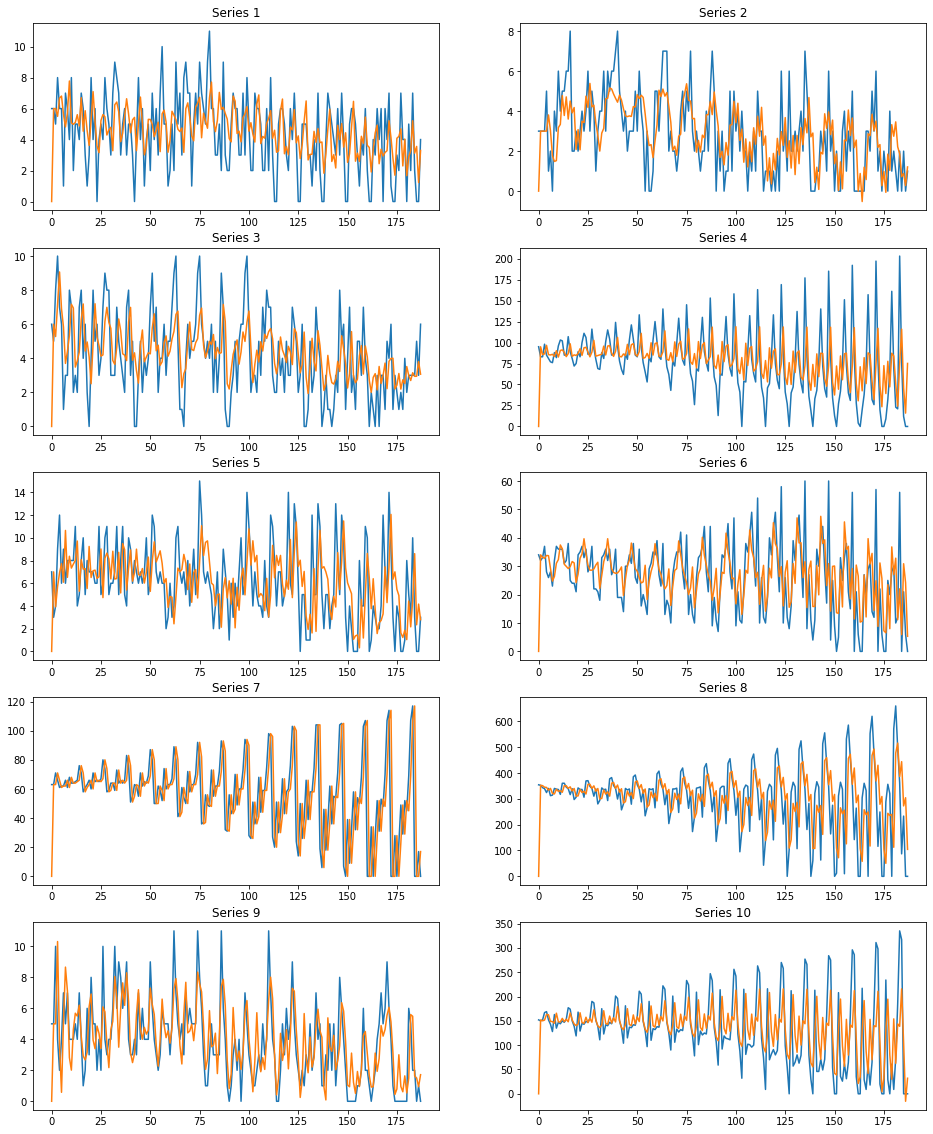

In [8]:
plot_fit(train_data, fitted_values, cols=2)

In [9]:
with open("sarima.pkl", "wb") as file:
    pickle.dump(multi_sarima, file)